In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
filepath = "../logs/logfile_lr_0.001_batch_32"
file = open(filepath, 'r')
training_dict = {"epoch": [], "training_acc": [], "training_loss": [], "eps_used": []}
test_dict = {"epoch": [], "test_acc": [], "test_loss": []}
epoch_count = 0

for line in file.readlines(): 
    if "Train Epoch:" in line: 
        arr = line.split("Train Epoch: ")[1]
        arr = arr.split("Loss: ")
        epoch = int(arr[0])
        
        arr = arr[1].split("Acc@1: ")
        training_loss = float(arr[0])

        arr = arr[1].split(" (ε spent so far = ")
        training_acc = float(arr[0])
        
        arr = arr[1].split(", δ = ")
        eps_spent = float(arr[0])
        
        arr = arr[1].split(")\n")
        delta = float(arr[0])
        
        # print(f"Epoch = {epoch}")
        # print(f"Training accuracy = {training_loss}")
        # print(f"Training accuracy = {training_acc}")
        # print(f"Epsilon used = {eps_spent}")
        # print(f"Delta = {delta}")
        
        training_dict["epoch"].append(epoch)
        training_dict["training_acc"].append(training_acc)
        training_dict["training_loss"].append(training_loss)
        training_dict["eps_used"].append(eps_spent)
        
    elif "Test set:" in line:
        arr = line.split("Test set:Loss: ")[1]
        arr = arr.split("Acc: ") 
        test_loss = float(arr[0])
        test_acc = float(arr[1])
        
        # print(f"Epoch = {epoch_count}")
        # print(f"Test loss = {test_loss}")
        # print(f"Test acc = {test_acc}")
        
        test_dict["epoch"].append(epoch)
        test_dict["test_acc"].append(test_acc)
        test_dict["test_loss"].append(test_loss)
        
        epoch_count += 1
        


In [61]:
training_df = pd.DataFrame.from_dict(training_dict)
training_df

,epoch,training_acc,training_loss,eps_used
0,0,4.803818,9.909310,3.12
1,0,8.089029,6.428858,3.50
2,0,9.703130,5.105981,3.74
3,0,11.062362,4.419458,3.91
4,0,12.073666,3.997510,4.05
...,...,...,...,...
175,29,51.359183,1.650771,9.91
176,29,51.266822,1.661503,9.93
177,29,51.403156,1.658919,9.95
178,29,51.533698,1.654270,9.97


In [66]:
epsilon_used_per_epoch_df = training_df.groupby("epoch").agg({"eps_used": max, "training_acc": max, "training_loss": min}).reset_index()
epsilon_used_per_epoch_df

,epoch,eps_used,training_acc,training_loss
0,0,4.16,13.015015,3.711716
1,1,4.69,20.426569,2.212166
2,2,5.07,24.817217,2.123505
3,3,5.39,27.924547,2.051725
4,4,5.68,31.557024,1.983203
5,5,5.94,33.478413,1.921219
6,6,6.18,35.420844,1.866598
7,7,6.41,38.191151,1.795876
8,8,6.62,39.256626,1.760522
9,9,6.83,40.481044,1.721577


In [62]:
test_df = pd.DataFrame.from_dict(test_dict)
test_df

,epoch,test_acc,test_loss
0,0,17.082668,2.266553
1,1,24.011581,2.163058
2,2,26.677316,2.080700
3,3,29.263179,2.016316
4,4,31.859026,1.951071
5,5,35.033946,1.884960
6,6,36.741214,1.831685
7,7,38.368610,1.778747
8,8,40.045927,1.729122
9,9,41.633387,1.679567


In [67]:
combined_df = pd.merge(epsilon_used_per_epoch_df, test_df, on="epoch")
combined_df

,epoch,eps_used,training_acc,training_loss,test_acc,test_loss
0,0,4.16,13.015015,3.711716,17.082668,2.266553
1,1,4.69,20.426569,2.212166,24.011581,2.163058
2,2,5.07,24.817217,2.123505,26.677316,2.080700
3,3,5.39,27.924547,2.051725,29.263179,2.016316
4,4,5.68,31.557024,1.983203,31.859026,1.951071
5,5,5.94,33.478413,1.921219,35.033946,1.884960
6,6,6.18,35.420844,1.866598,36.741214,1.831685
7,7,6.41,38.191151,1.795876,38.368610,1.778747
8,8,6.62,39.256626,1.760522,40.045927,1.729122
9,9,6.83,40.481044,1.721577,41.633387,1.679567


In [75]:
def calculate_diff(df): 
    for i in range(len(df)):
        if i == 0: 
            df["eps_diff"] = df["eps_used"].iloc[i]
            df["training_acc_diff"] = 100 - df["training_acc"].iloc[i]
            df["training_loss_diff"] = df["training_loss"].iloc[i]
            df["test_acc_diff"] = 100 - df["test_acc"].iloc[i]
            df["test_loss_diff"] = df["test_loss"].iloc[i]
        else: 
            df["eps_diff"].iloc[i] = df["eps_used"].iloc[i] - df["eps_used"].iloc[i - 1]
            df["training_acc_diff"].iloc[i] = df["training_acc"].iloc[i] - df["training_acc"].iloc[i - 1]
            df["training_loss_diff"].iloc[i] = df["training_loss"].iloc[i] - df["training_loss"].iloc[i - 1]
            df["test_acc_diff"].iloc[i] = df["test_acc"].iloc[i] - df["test_acc"].iloc[i - 1]
            df["test_loss_diff"].iloc[i] = df["test_loss"].iloc[i] - df["test_loss"].iloc[i - 1]

calculate_diff(combined_df)
combined_df

/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eps_diff"].iloc[i] = df["eps_used"].iloc[i] - df["eps_used"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["training_acc_diff"].iloc[i] = df["training_acc"].iloc[i] - df["training_acc"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

,epoch,eps_used,training_acc,training_loss,test_acc,test_loss,eps_diff,training_acc_diff,training_loss_diff,test_acc_diff,test_loss_diff
0,0,4.16,13.015015,3.711716,17.082668,2.266553,4.16,86.984985,3.711716,82.917332,2.266553
1,1,4.69,20.426569,2.212166,24.011581,2.163058,0.53,7.411554,-1.499550,6.928913,-0.103495
2,2,5.07,24.817217,2.123505,26.677316,2.080700,0.38,4.390648,-0.088661,2.665735,-0.082358
3,3,5.39,27.924547,2.051725,29.263179,2.016316,0.32,3.107330,-0.071780,2.585863,-0.064384
4,4,5.68,31.557024,1.983203,31.859026,1.951071,0.29,3.632477,-0.068522,2.595847,-0.065245
5,5,5.94,33.478413,1.921219,35.033946,1.884960,0.26,1.921389,-0.061984,3.174920,-0.066111
6,6,6.18,35.420844,1.866598,36.741214,1.831685,0.24,1.942431,-0.054621,1.707268,-0.053275
7,7,6.41,38.191151,1.795876,38.368610,1.778747,0.23,2.770307,-0.070722,1.627396,-0.052938
8,8,6.62,39.256626,1.760522,40.045927,1.729122,0.21,1.065475,-0.035354,1.677317,-0.049625
9,9,6.83,40.481044,1.721577,41.633387,1.679567,0.21,1.224418,-0.038945,1.587460,-0.049555


Text(0.5, 1.0, 'Training Accuracy Improvement as a Function of Epsilon')

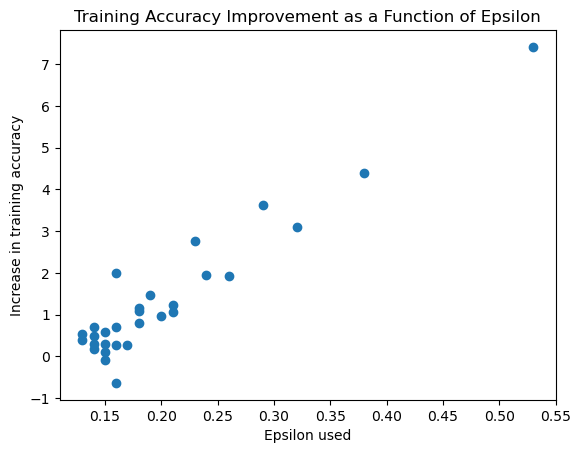

In [78]:
plt.figure()
plt.plot(combined_df["eps_diff"].iloc[1:], combined_df["training_acc_diff"].iloc[1:], 'o')
plt.xlabel("Epsilon used")
plt.ylabel("Increase in training accuracy")
plt.title("Training Accuracy Improvement as a Function of Epsilon")

# Combined per-epoch graphs

In [93]:
def generate_plot(filepath, plotting_var="training_acc_diff"): 
    file = open(filepath, 'r')
    training_dict = {"epoch": [], "training_acc": [], "training_loss": [], "eps_used": []}
    test_dict = {"epoch": [], "test_acc": [], "test_loss": []}
    epoch_count = 0

    for line in file.readlines(): 
        if "Train Epoch:" in line: 
            arr = line.split("Train Epoch: ")[1]
            arr = arr.split("Loss: ")
            epoch = int(arr[0])
            
            arr = arr[1].split("Acc@1: ")
            training_loss = float(arr[0])

            arr = arr[1].split(" (ε spent so far = ")
            training_acc = float(arr[0])
            
            arr = arr[1].split(", δ = ")
            eps_spent = float(arr[0])
            
            arr = arr[1].split(")\n")
            delta = float(arr[0])
            
            training_dict["epoch"].append(epoch)
            training_dict["training_acc"].append(training_acc)
            training_dict["training_loss"].append(training_loss)
            training_dict["eps_used"].append(eps_spent)
            
        elif "Test set:" in line:
            arr = line.split("Test set:Loss: ")[1]
            arr = arr.split("Acc: ") 
            test_loss = float(arr[0])
            test_acc = float(arr[1])
            
            test_dict["epoch"].append(epoch)
            test_dict["test_acc"].append(test_acc)
            test_dict["test_loss"].append(test_loss)
            
            epoch_count += 1
            
            
    training_df = pd.DataFrame.from_dict(training_dict)
    epsilon_used_per_epoch_df = training_df.groupby("epoch").agg({"eps_used": max, "training_acc": max, "training_loss": min}).reset_index()
    test_df = pd.DataFrame.from_dict(test_dict)
    combined_df = pd.merge(epsilon_used_per_epoch_df, test_df, on="epoch")
    calculate_diff(combined_df)
    
    plt.plot(combined_df["eps_diff"].iloc[1:], combined_df[plotting_var].iloc[1:], 'o')

/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eps_diff"].iloc[i] = df["eps_used"].iloc[i] - df["eps_used"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["training_acc_diff"].iloc[i] = df["training_acc"].iloc[i] - df["training_acc"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

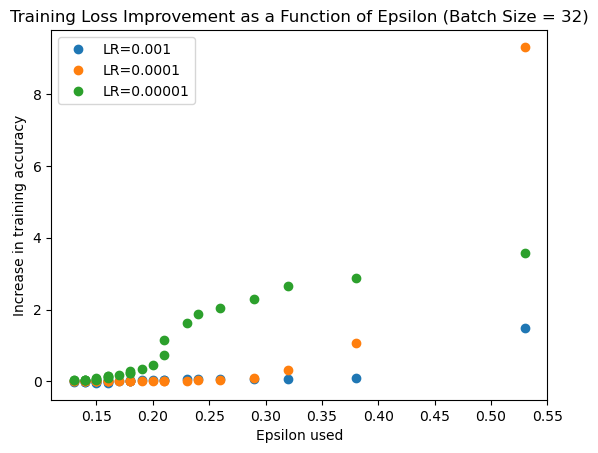

In [89]:
filepaths = ["../logs/logfile_lr_0.001_batch_32", "../logs/logfile_lr_0.0001_batch_32", "../logs/logfile_lr_1e-05_batch_32"]       
# training_acc_diff	training_loss_diff	test_acc_diff	test_loss_diff
plt.figure()
for path in filepaths: 
    generate_plot(path, "test_acc_diff")
plt.xlabel("Epsilon used")
plt.ylabel("Increase in training accuracy")
plt.title("Training Loss Improvement as a Function of Epsilon (Batch Size = 32)")
plt.legend(["LR=0.001", "LR=0.0001", "LR=0.00001"])

/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eps_diff"].iloc[i] = df["eps_used"].iloc[i] - df["eps_used"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["training_acc_diff"].iloc[i] = df["training_acc"].iloc[i] - df["training_acc"].iloc[i - 1]
/var/folders/tq/bdc0pgzn7jg3wj6xkgfkbt3c0000gn/T/ipykernel_46389/2772298834.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

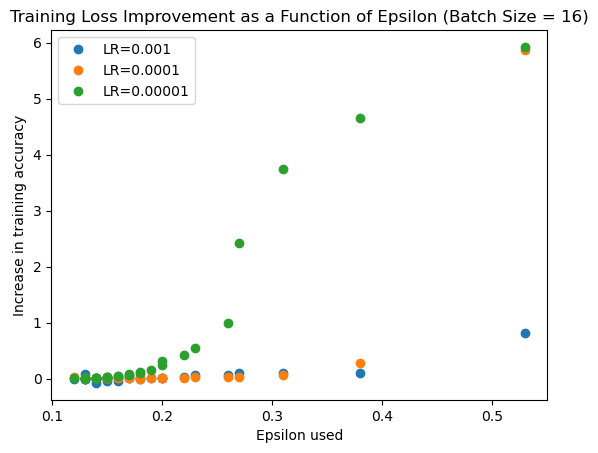

In [92]:
filepaths = ["../logs/logfile_lr_0.001_batch_16", "../logs/logfile_lr_0.0001_batch_16", "../logs/logfile_lr_1e-05_batch_16"] 
plt.figure()
for path in filepaths: 
    generate_plot(path, "training_loss_diff")
plt.xlabel("Epsilon used")
plt.ylabel("Increase in training accuracy")
plt.title("Training Loss Improvement as a Function of Epsilon (Batch Size = 16)")
plt.legend(["LR=0.001", "LR=0.0001", "LR=0.00001"])      
# plt.figure()
# for path in filepaths: 
#     generate_plot(path)
# plt.xlabel("Epsilon used")
# plt.ylabel("Decrease in Training Loss")
# plt.title("Training Loss Reduction as a Function of Epsilon (Batch Size = 16)")
# plt.legend(["LR=0.001", "LR=0.0001", "LR=0.00001"])

# Combined graphs over course of epochs

In [107]:
def generate_training_plot(filepath): 
    file = open(filepath, 'r')
    training_dict = {"epoch": [], "training_acc": [], "training_loss": [], "eps_used": []}
    test_dict = {"epoch": [], "test_acc": [], "test_loss": []}
    epoch_count = 0

    for line in file.readlines(): 
        if "Train Epoch:" in line: 
            arr = line.split("Train Epoch: ")[1]
            arr = arr.split("Loss: ")
            epoch = int(arr[0])
            
            arr = arr[1].split("Acc@1: ")
            training_loss = float(arr[0])

            arr = arr[1].split(" (ε spent so far = ")
            training_acc = float(arr[0])
            
            arr = arr[1].split(", δ = ")
            eps_spent = float(arr[0])
            
            arr = arr[1].split(")\n")
            delta = float(arr[0])
            
            training_dict["epoch"].append(epoch)
            training_dict["training_acc"].append(training_acc)
            training_dict["training_loss"].append(training_loss)
            training_dict["eps_used"].append(eps_spent)
            
        elif "Test set:" in line:
            arr = line.split("Test set:Loss: ")[1]
            arr = arr.split("Acc: ") 
            test_loss = float(arr[0])
            test_acc = float(arr[1])
            
            test_dict["epoch"].append(epoch)
            test_dict["test_acc"].append(test_acc)
            test_dict["test_loss"].append(test_loss)
            
            epoch_count += 1
            
            
    training_df = pd.DataFrame.from_dict(training_dict)
    epsilon_used_per_epoch_df = training_df.groupby("epoch").agg({"eps_used": max, "training_acc": max, "training_loss": min}).reset_index()
    test_df = pd.DataFrame.from_dict(test_dict)
    combined_df = pd.merge(epsilon_used_per_epoch_df, test_df, on="epoch")
    plt.plot(combined_df["eps_used"])
    # return combined_df["eps_used"]

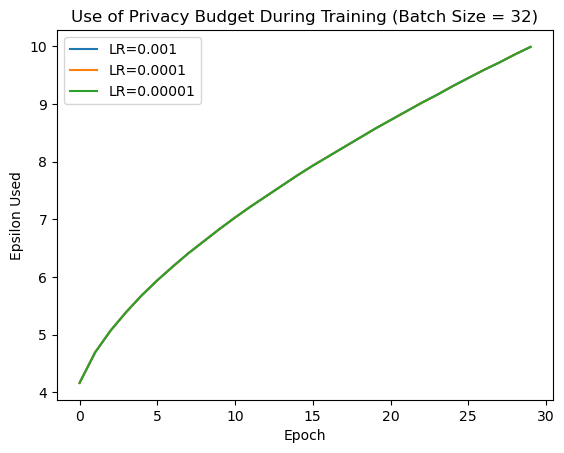

In [108]:
filepaths = ["../logs/logfile_lr_0.001_batch_32", "../logs/logfile_lr_0.0001_batch_32", "../logs/logfile_lr_1e-05_batch_32"]       
# training_acc_diff	training_loss_diff	test_acc_diff	test_loss_diff
plt.figure()
i = 0
syms = ['o', '-', 'o-']
for path in filepaths: 
    arr = generate_training_plot(path, syms[i])
    i += 1
plt.xlabel("Epoch")
plt.ylabel("Epsilon Used")
plt.title("Use of Privacy Budget During Training (Batch Size = 32)")
plt.legend(["LR=0.001", "LR=0.0001", "LR=0.00001"])